In [1]:
import numpy as np
from tensorflow.keras.applications import ResNet152V2, VGG16, DenseNet121, EfficientNetB7
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

import matplotlib.pyplot as plt
from keras.models import load_model
#crea vectores de optimizadores
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad

In [2]:
import tensorflow as tf; 
from tensorflow.python.client import device_lib
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))
device_lib.list_local_devices()

2.10.0
[]


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 18383285370061138989
 xla_global_id: -1]

In [3]:
import tensorflow as tf

# Crea una operación simple para que TensorFlow ejecute en la GPU
with tf.device('/GPU:0'):
    a = tf.constant([[1.0, 2.0], [3.0, 4.0]])
    b = tf.constant([[1.0, 1.0], [0.0, 1.0]])
    c = tf.matmul(a, b)

print(c)

tf.Tensor(
[[1. 3.]
 [3. 7.]], shape=(2, 2), dtype=float32)


In [4]:
models = [ResNet152V2, VGG16, DenseNet121, EfficientNetB7]
model_names = ['ResNet152V2', 'VGG16', 'DenseNet121', 'EfficientNetB7']
colors = ['b', 'g', 'r', 'c']
# Almacena las métricas de todos los modelos
all_accuracy = [[] for _ in range(len(models))]
all_val_accuracy = [[] for _ in range(len(models))]
all_loss = [[] for _ in range(len(models))]
all_val_loss = [[] for _ in range(len(models))]
batch_size = 32
epochs = 10

In [5]:
optimizers = [Adam(),SGD, RMSprop, Adagrad]
rotaciones = [10, 20, 30]
epochs_loop = [10, 20, 30]
losses = ['categorical_crossentropy','sparse_categorical_crossentropy']

In [6]:
for loss in losses:
    # loop for each optimizer
    for optimizer in optimizers:
        # loop for each rotation
        for rotation in rotaciones:
            # loop for each epoch_loop
            for epoch_loop in epochs_loop:
                for i, model_func in enumerate(models):
                    # Carga la arquitectura del modelo con pesos preentrenados en ImageNet
                    base_model = model_func(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

                    # Congela las capas del modelo base para no entrenarlas
                    for layer in base_model.layers:
                        layer.trainable = False

                    # Añade nuevas capas al final del modelo
                    model = Sequential([
                        base_model,
                        Flatten(),
                        Dense(7, activation='softmax')  # Asume que hay 7 tipos diferentes de árboles/plantas
                    ])

                    # Compila el modelo
                    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

                    # Genera datos de entrenamiento, validacion y pruebas a partir de las imágenes en la carpeta 'dataset'
                    train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=rotation)
                    train_generator = train_datagen.flow_from_directory('../../dataset/train', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')

                    validation_datagen = ImageDataGenerator(rescale=1./255)
                    validation_generator = validation_datagen.flow_from_directory('../../dataset/train', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')

                    test_datagen = ImageDataGenerator(rescale=1./255)
                    test_generator = test_datagen.flow_from_directory('../../dataset/test', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')

                    # Entrena el modelo
                    history = model.fit(
                        train_generator,
                        validation_data=validation_generator,        
                        epochs=epoch_loop
                    )
                    
                    print(loss, optimizer, rotation, epoch_loop, history.history['accuracy'], history.history['val_accuracy'], history.history['loss'], history.history['val_loss'])

                    # Almacena las métricas por epoch
                    all_accuracy[i] = history.history['accuracy']
                    all_val_accuracy[i] = history.history['val_accuracy']
                    all_loss[i] = history.history['loss']
                    all_val_loss[i] = history.history['val_loss']

                    # Evalua el modelo
                    loss, accuracy = model.evaluate(test_generator)
                    print(f'{model_names[i]} - Loss: {loss}, Accuracy: {accuracy}, optimizer {optimizer}, rot {rotation}, epoch {epoch_loop}')

                    #save model
                    model.save(f'../../models/{model_names[i]}.keras')    

Found 2640 images belonging to 7 classes.
Found 2640 images belonging to 7 classes.
Found 630 images belonging to 7 classes.
Epoch 1/10
83/83 [==============================] - 132s 2s/step - loss: 1.8190 - accuracy: 0.6905 - val_loss: 0.2999 - val_accuracy: 0.9277
Epoch 2/10
83/83 [==============================] - 124s 1s/step - loss: 0.3862 - accuracy: 0.9121 - val_loss: 0.1136 - val_accuracy: 0.9712
Epoch 3/10
83/83 [==============================] - 125s 2s/step - loss: 0.2074 - accuracy: 0.9557 - val_loss: 0.0786 - val_accuracy: 0.9799
Epoch 4/10
83/83 [==============================] - 125s 2s/step - loss: 0.2266 - accuracy: 0.9527 - val_loss: 0.1174 - val_accuracy: 0.9693
Epoch 5/10
83/83 [==============================] - 131s 2s/step - loss: 0.2544 - accuracy: 0.9557 - val_loss: 0.1246 - val_accuracy: 0.9723
Epoch 6/10
83/83 [==============================] - 131s 2s/step - loss: 0.1804 - accuracy: 0.9591 - val_loss: 0.0734 - val_accuracy: 0.9799
Epoch 7/10
83/83 [===========

ValueError: in user code:

    File "c:\Users\PC\.conda\envs\TFEModels\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\PC\.conda\envs\TFEModels\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\PC\.conda\envs\TFEModels\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\PC\.conda\envs\TFEModels\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\PC\.conda\envs\TFEModels\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "c:\Users\PC\.conda\envs\TFEModels\lib\site-packages\keras\engine\compile_utils.py", line 240, in __call__
        self.build(y_pred)
    File "c:\Users\PC\.conda\envs\TFEModels\lib\site-packages\keras\engine\compile_utils.py", line 182, in build
        self._losses = tf.nest.map_structure(
    File "c:\Users\PC\.conda\envs\TFEModels\lib\site-packages\keras\engine\compile_utils.py", line 353, in _get_loss_object
        loss = losses_mod.get(loss)
    File "c:\Users\PC\.conda\envs\TFEModels\lib\site-packages\keras\losses.py", line 2654, in get
        raise ValueError(

    ValueError: Could not interpret loss function identifier: 0.4943787157535553


In [ ]:
for loss in losses:
    # loop for each optimizer
    for optimizer in optimizers:
        # loop for each rotation
        for rotation in rotaciones:
            # loop for each epoch_loop
            for epoch_loop in epochs_loop:
                for i, model_func in enumerate(models):
                    # Carga la arquitectura del modelo con pesos preentrenados en ImageNet
                    base_model = model_func(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

                    # Congela las capas del modelo base para no entrenarlas
                    for layer in base_model.layers:
                        layer.trainable = False

                    # Añade nuevas capas al final del modelo
                    model = Sequential([
                        base_model,
                        Flatten(),
                        Dense(7, activation='softmax')  # Asume que hay 7 tipos diferentes de árboles/plantas
                    ])

                    # Compila el modelo
                    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

                    # Genera datos de entrenamiento, validacion y pruebas a partir de las imágenes en la carpeta 'dataset'
                    train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=rotation)
                    train_generator = train_datagen.flow_from_directory('../../dataset/train', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')

                    validation_datagen = ImageDataGenerator(rescale=1./255)
                    validation_generator = validation_datagen.flow_from_directory('../../dataset/train', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')

                    test_datagen = ImageDataGenerator(rescale=1./255)
                    test_generator = test_datagen.flow_from_directory('../../dataset/test', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')

                    # Entrena el modelo
                    history = model.fit(
                        train_generator,
                        validation_data=validation_generator,        
                        epochs=epoch_loop
                    )
                    
                    print(loss, optimizer, rotation, epoch_loop, history.history['accuracy'], history.history['val_accuracy'], history.history['loss'], history.history['val_loss'])

                    # Almacena las métricas por epoch
                    all_accuracy[i] = history.history['accuracy']
                    all_val_accuracy[i] = history.history['val_accuracy']
                    all_loss[i] = history.history['loss']
                    all_val_loss[i] = history.history['val_loss']

                    # Evalua el modelo
                    loss, accuracy = model.evaluate(test_generator)
                    print(f'{model_names[i]} - Loss: {loss}, Accuracy: {accuracy}, optimizer {optimizer}, rot {rotation}, epoch {epoch_loop}')

                    #save model
                    model.save(f'../../models/{model_names[i]}.keras')    

Found 2640 images belonging to 7 classes.
Found 2640 images belonging to 7 classes.
Found 630 images belonging to 7 classes.
Epoch 1/10
83/83 [==============================] - 132s 2s/step - loss: 1.8190 - accuracy: 0.6905 - val_loss: 0.2999 - val_accuracy: 0.9277
Epoch 2/10
83/83 [==============================] - 124s 1s/step - loss: 0.3862 - accuracy: 0.9121 - val_loss: 0.1136 - val_accuracy: 0.9712
Epoch 3/10
83/83 [==============================] - 125s 2s/step - loss: 0.2074 - accuracy: 0.9557 - val_loss: 0.0786 - val_accuracy: 0.9799
Epoch 4/10
83/83 [==============================] - 125s 2s/step - loss: 0.2266 - accuracy: 0.9527 - val_loss: 0.1174 - val_accuracy: 0.9693
Epoch 5/10
83/83 [==============================] - 131s 2s/step - loss: 0.2544 - accuracy: 0.9557 - val_loss: 0.1246 - val_accuracy: 0.9723
Epoch 6/10
83/83 [==============================] - 131s 2s/step - loss: 0.1804 - accuracy: 0.9591 - val_loss: 0.0734 - val_accuracy: 0.9799
Epoch 7/10
83/83 [===========

ValueError: in user code:

    File "c:\Users\PC\.conda\envs\TFEModels\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\PC\.conda\envs\TFEModels\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\PC\.conda\envs\TFEModels\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\PC\.conda\envs\TFEModels\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\PC\.conda\envs\TFEModels\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "c:\Users\PC\.conda\envs\TFEModels\lib\site-packages\keras\engine\compile_utils.py", line 240, in __call__
        self.build(y_pred)
    File "c:\Users\PC\.conda\envs\TFEModels\lib\site-packages\keras\engine\compile_utils.py", line 182, in build
        self._losses = tf.nest.map_structure(
    File "c:\Users\PC\.conda\envs\TFEModels\lib\site-packages\keras\engine\compile_utils.py", line 353, in _get_loss_object
        loss = losses_mod.get(loss)
    File "c:\Users\PC\.conda\envs\TFEModels\lib\site-packages\keras\losses.py", line 2654, in get
        raise ValueError(

    ValueError: Could not interpret loss function identifier: 0.4943787157535553


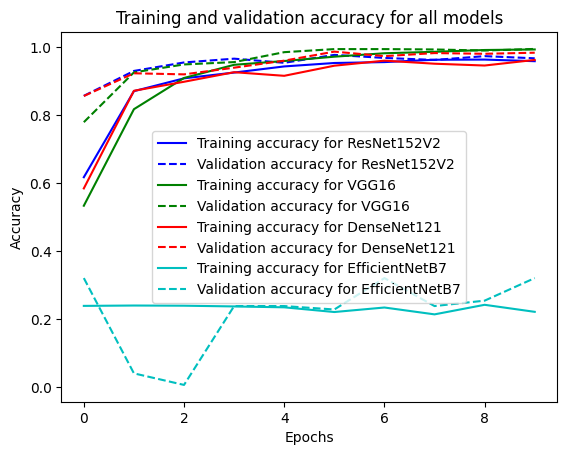

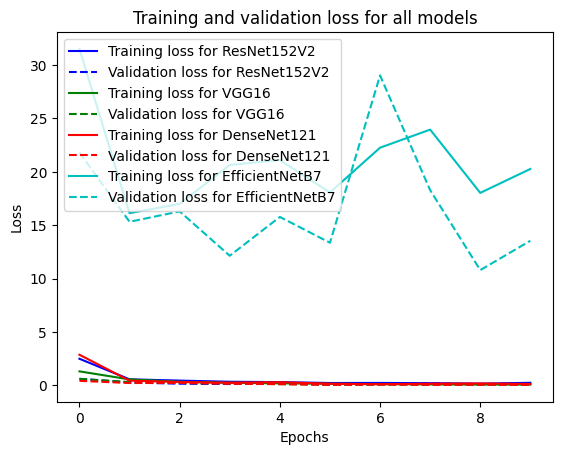

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [4]:
# Grafica la precisión de entrenamiento y validación de todos los modelos
plt.figure()
for i in range(len(models)):
    epochs = range(len(all_accuracy[i]))
    plt.plot(epochs, all_accuracy[i], colors[i], label=f'Training accuracy for {model_names[i]}')
    plt.plot(epochs, all_val_accuracy[i], colors[i], linestyle='--', label=f'Validation accuracy for {model_names[i]}')
plt.title('Training and validation accuracy for all models')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Grafica la pérdida de entrenamiento y validación de todos los modelos
plt.figure()
for i in range(len(models)):
    epochs = range(len(all_loss[i]))
    plt.plot(epochs, all_loss[i], colors[i], label=f'Training loss for {model_names[i]}')
    plt.plot(epochs, all_val_loss[i], colors[i], linestyle='--', label=f'Validation loss for {model_names[i]}')
plt.title('Training and validation loss for all models')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(history.history.keys())

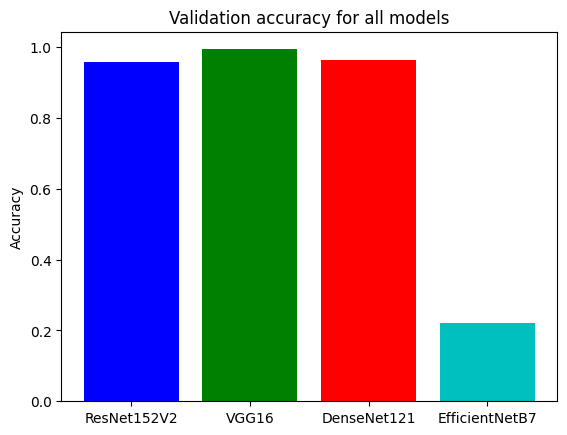

In [5]:
#grafica de barras final de accuracy
plt.figure()
for i in range(len(models)):
    plt.bar(model_names[i], all_accuracy[i][-1], color=colors[i])
plt.title('Validation accuracy for all models')
plt.ylabel('Accuracy')
plt.show()

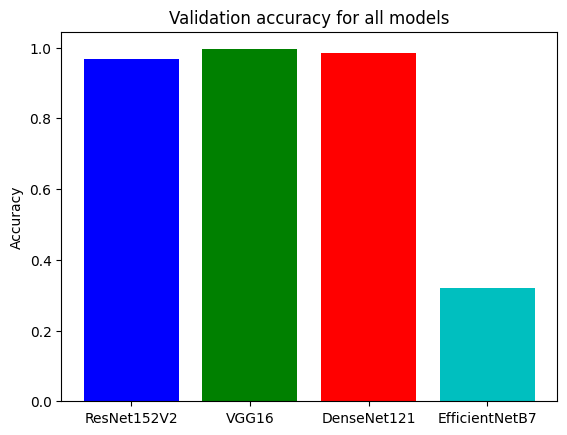

In [6]:
#grafica de barras final de accuracy
plt.figure()
for i in range(len(models)):
    plt.bar(model_names[i], all_val_accuracy[i][-1], color=colors[i])
plt.title('Validation accuracy for all models')
plt.ylabel('Accuracy')
plt.show()           

Found 446 images belonging to 7 classes.
Test loss for ResNet152V2: 1.1903165578842163
Test accuracy for ResNet152V2: 0.8856502175331116
Test loss for VGG16: 0.18835677206516266
Test accuracy for VGG16: 0.9573991298675537
Test loss for DenseNet121: 0.2504918575286865
Test accuracy for DenseNet121: 0.9417040348052979
Test loss for EfficientNetB7: 12.495935440063477
Test accuracy for EfficientNetB7: 0.3139013350009918


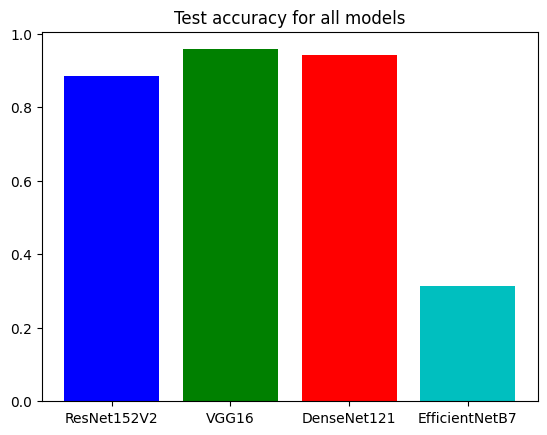

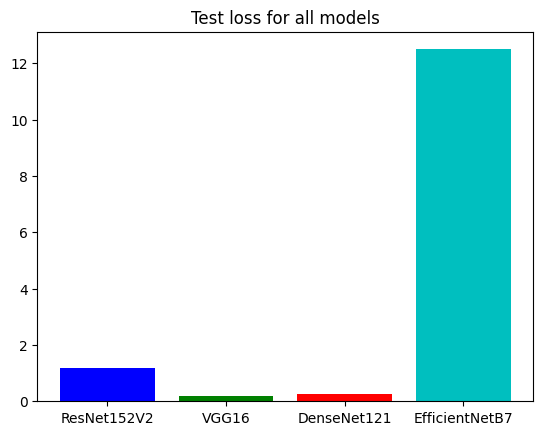

In [7]:
# Almacena las métricas de todos los modelos
all_test_accuracy = []
all_test_loss = []

batch_size = 32

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('../../dataset/test', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')

for i, model_name in enumerate(model_names):
    # Carga el modelo
    model = load_model(f'../../models/{model_name}.keras')

    # Evalúa el modelo con los datos de prueba
    score = model.evaluate(test_generator, verbose=0)
    print(f'Test loss for {model_name}:', score[0])
    print(f'Test accuracy for {model_name}:', score[1])

    # Almacena las métricas de prueba
    all_test_loss.append(score[0])
    all_test_accuracy.append(score[1])

# Grafica la precisión de prueba de todos los modelos
plt.figure()
plt.bar(model_names, all_test_accuracy, color=colors)
plt.title('Test accuracy for all models')
plt.show()

# Grafica la pérdida de prueba de todos los modelos
plt.figure()
plt.bar(model_names, all_test_loss, color=colors)
plt.title('Test loss for all models')
plt.show()